In [69]:
import numpy as np
import pandas as pd

In [70]:
# Get The data
raw_data = pd.read_csv(('weatherAUS.csv'))
raw_data.info()
raw_data.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

(145460, 23)

***Cleaning the data***

In [71]:
# Checking all the null vals
raw_data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [72]:
# filling all the null values from the numerical data with their respective mean value
# This method is taken from a kaggle code, but we have some different names, but 
# I think i'ts okey to use the same method.

raw_data['MinTemp']=raw_data['MinTemp'].fillna(raw_data['MinTemp'].mean())
raw_data['MaxTemp']=raw_data['MaxTemp'].fillna(raw_data['MaxTemp'].mean())
raw_data['Rainfall']=raw_data['Rainfall'].fillna(raw_data['Rainfall'].mean())
raw_data['Evaporation']=raw_data['Evaporation'].fillna(raw_data['Evaporation'].mean())
raw_data['Sunshine']=raw_data['Sunshine'].fillna(raw_data['Sunshine'].mean())
raw_data['WindGustSpeed']=raw_data['WindGustSpeed'].fillna(raw_data['WindGustSpeed'].mean())
raw_data['WindSpeed9am']=raw_data['WindSpeed9am'].fillna(raw_data['WindSpeed9am'].mean())
raw_data['WindSpeed3pm']=raw_data['WindSpeed3pm'].fillna(raw_data['WindSpeed3pm'].mean())
raw_data['Humidity9am']=raw_data['Humidity9am'].fillna(raw_data['Humidity9am'].mean())
raw_data['Humidity3pm']=raw_data['Humidity3pm'].fillna(raw_data['Humidity3pm'].mean())
raw_data['Pressure9am']=raw_data['Pressure9am'].fillna(raw_data['Pressure9am'].mean())
raw_data['Pressure3pm']=raw_data['Pressure3pm'].fillna(raw_data['Pressure3pm'].mean())
raw_data['Cloud9am']=raw_data['Cloud9am'].fillna(raw_data['Cloud9am'].mean())
raw_data['Cloud3pm']=raw_data['Cloud3pm'].fillna(raw_data['Cloud3pm'].mean())
raw_data['Temp9am']=raw_data['Temp9am'].fillna(raw_data['Temp9am'].mean())
raw_data['Temp3pm']=raw_data['Temp3pm'].fillna(raw_data['Temp3pm'].mean())    

In [73]:
# Filling all the null values from the categorical data with their most frequently occurring value
raw_data['WindGustDir']=raw_data['WindGustDir'].fillna(raw_data['WindGustDir'].mode()[0])
raw_data['WindDir9am']=raw_data['WindDir9am'].fillna(raw_data['WindDir9am'].mode()[0])
raw_data['WindDir3pm']=raw_data['WindDir3pm'].fillna(raw_data['WindDir3pm'].mode()[0])
raw_data['RainToday']=raw_data['RainToday'].fillna(raw_data['RainToday'].mode()[0])
raw_data['RainTomorrow']=raw_data['RainTomorrow'].fillna(raw_data['RainTomorrow'].mode()[0])

In [74]:
raw_data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [75]:
# making categorical yes and no to 1 and 0 respectivevly
raw_data['RainTomorrow']=raw_data['RainTomorrow'].map({'Yes':1,'No':0})
raw_data['RainToday']=raw_data['RainToday'].map({'Yes':1,'No':0})

In [76]:
#from date convert to day, month
raw_data['Date']=pd.to_datetime(raw_data['Date'])
raw_data['day']=raw_data['Date'].dt.day
raw_data['month']=raw_data['Date'].dt.month
#drop date
raw_data.drop('Date',axis=1,inplace=True)

In [77]:
raw_data.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month
0,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,...,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,1,12
1,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,...,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,2,12
2,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,...,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,3,12
3,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,...,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,4,12
4,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,...,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,5,12


In [78]:
raw_data=pd.get_dummies(raw_data)
index = raw_data.columns.get_loc('RainTomorrow')
print(index)

17


In [79]:
raw_data.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


In [80]:
#label are the value we want to predict
labels=raw_data['RainTomorrow']

#remove the label from the features
raw_data=raw_data.drop('RainTomorrow',axis=1)

#saving feature name 
feature_list=list(raw_data.columns)

In [81]:
from sklearn.model_selection import train_test_split

#split the data into training and testing sets
train_features,test_features,train_labels,test_labels=train_test_split(raw_data,labels,test_size=0.20,random_state=42)


In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(20, weights='uniform')
model.fit(train_features,train_labels)

KNeighborsClassifier(n_neighbors=20)

In [83]:
#calculate accuracy
accuracy=model.score(test_features,test_labels)
print('Accuracy: ',round(accuracy,2)*100,'%')

Accuracy:  84.0 %


In [84]:
from sklearn.model_selection import cross_val_score

k_s = np.linspace(1, 35, num=35, dtype=int)
best_k = 0
best_cv = 0
iteration = 1
for k in k_s:
    model = neighbors.KNeighborsClassifier(k, weights='uniform')
    model.fit(train_features,train_labels)
    cv_scores = cross_val_score(model, train_features, train_labels, cv=10, scoring='f1_macro')
    mean_cv = np.mean(cv_scores, axis=0)
    
    if mean_cv > best_cv:
        best_cv = mean_cv
        best_k = k
        
    print(f'Iteration {iteration}, Current best k = {best_k}, Current best cv: {best_cv}')
    iteration += 1

Iteration 1, Current best k = 1, Current best cv: 0.6986402579082683
Iteration 2, Current best k = 1, Current best cv: 0.6986402579082683
Iteration 3, Current best k = 3, Current best cv: 0.7252510535823856
Iteration 4, Current best k = 3, Current best cv: 0.7252510535823856
Iteration 5, Current best k = 5, Current best cv: 0.7317383389680343
Iteration 6, Current best k = 5, Current best cv: 0.7317383389680343
Iteration 7, Current best k = 7, Current best cv: 0.7364969623366594
Iteration 8, Current best k = 7, Current best cv: 0.7364969623366594
Iteration 9, Current best k = 9, Current best cv: 0.7368011484231667
Iteration 10, Current best k = 9, Current best cv: 0.7368011484231667
Iteration 11, Current best k = 11, Current best cv: 0.7380307521758249
Iteration 12, Current best k = 11, Current best cv: 0.7380307521758249
Iteration 13, Current best k = 13, Current best cv: 0.7385355377899965
Iteration 14, Current best k = 13, Current best cv: 0.7385355377899965
Iteration 15, Current bes

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

pca = PCA(n_components=2)
train_features_pca = pca.fit_transform(train_features)

# Train a K-nearest neighbor classifier on the projected data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features_pca, train_labels)

# Create a meshgrid of points to represent the entire feature space
x_min, x_max = train_features_pca[:, 0].min() - 1, train_features_pca[:, 0].max() + 1
y_min, y_max = train_features_pca[:, 1].min() - 1, train_features_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Classify each point in the meshgrid using the trained KNeighborsClassifier model
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


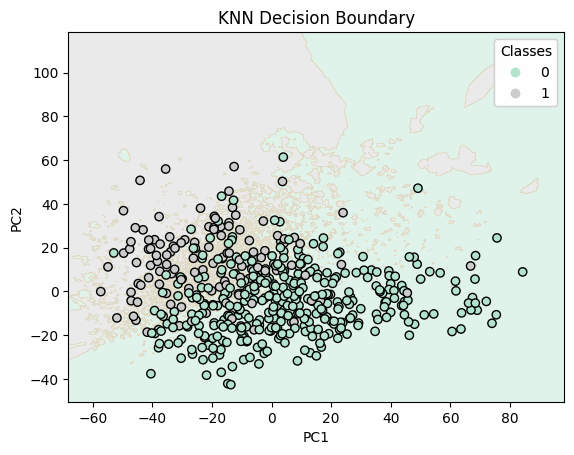

In [68]:
# Plot the data points, colored by their true labels, and the decision boundary
fig, ax = plt.subplots()
ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.get_cmap('Pastel2'))
ploten = ax.scatter(train_features_pca[1:500, 0], train_features_pca[1:500, 1], c=train_labels[1:500], cmap=plt.get_cmap('Pastel2'), edgecolor='k')
legend1 = ax.legend(*ploten.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('KNN Decision Boundary')
plt.show()